**You can find the data in below link:**
[Download Data](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

# Regression project

In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

In [2]:
# import the data
df = pd.read_csv('TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# check the none value
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df['saledate'].dtype

dtype('O')

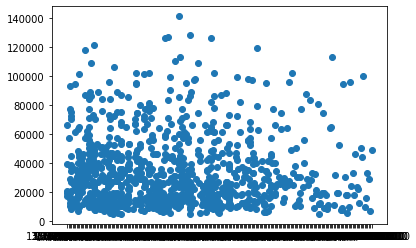

In [6]:
# make the data visualize
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

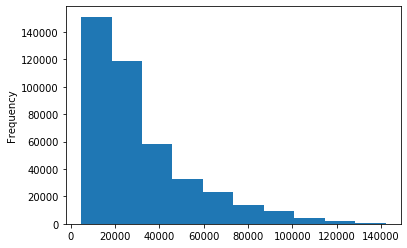

In [7]:
# check it with histogram
df['SalePrice'].plot.hist()

### Parsing dates

In [8]:
# import the data with parse dates
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [9]:
# check the type of saledate
df['saledate'].dtype

dtype('<M8[ns]')

In [10]:
# see the head of saledate
df['saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

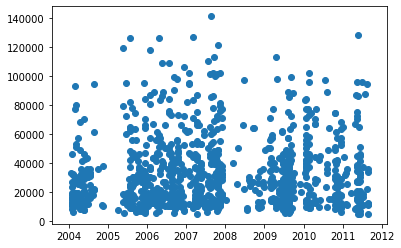

In [11]:
# make data visualize
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [12]:
# to see the full data
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
# sort dataframe by sale-date
df.sort_values(by=['saledate'], ascending=True,  inplace=True)

In [14]:
# see the sorted data
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [15]:
# make a copy of our dataframe 
df_tmp = df.copy()

In [16]:
# check the df_tmp data
df_tmp['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [17]:
# create new column 'saleYear'
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

In [18]:
# see the column we created
df_tmp['saleYear'].head(10)

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
54653     1989
81383     1989
204924    1989
135376    1989
113390    1989
Name: saleYear, dtype: int64

In [19]:
# see all the data 
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# drop the sale-date column because we don't need it
df_tmp.drop('saledate', axis=1, inplace=True)

In [21]:
# check the values of different columns
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modelling 

In [22]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# instantiate the model 
model = RandomForestRegressor(n_jobs=-1, random_state=80)
# fit the data to the model
# model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])
# we'll get an error because of none and non-numerical values

### Make all the data numerical (Categorical)

In [23]:
# check if the data is string or not 
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [24]:
# find the columns which contains string
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# turn all the string values into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
# see the data type
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
# see the code of categories
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [29]:
# check the ratio of missing data
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### save the preprocessed data

In [30]:
df_tmp.head(3).T

,205615,274835,141296
SalesID,1646770,1821514,1505138
SalePrice,9500,14000,50000
MachineID,1126363,1194089,1473654
ModelID,8434,10150,4139
datasource,132,132,132
auctioneerID,18,99,99
YearMade,1974,1980,1978
MachineHoursCurrentMeter,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G


### Fill the missing values

In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [32]:
# check the numerical values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [33]:
# fill the numerical values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label + '_missing'] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [34]:
# check again the numerical values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [35]:
# check all the data
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [36]:
# check the info 
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   SalesID                           412698 non-null  int64   
 1   SalePrice                         412698 non-null  float64 
 2   MachineID                         412698 non-null  int64   
 3   ModelID                           412698 non-null  int64   
 4   datasource                        412698 non-null  int64   
 5   auctioneerID                      412698 non-null  float64 
 6   YearMade                          412698 non-null  int64   
 7   MachineHoursCurrentMeter          412698 non-null  float64 
 8   UsageBand                         73670 non-null   category
 9   fiModelDesc                       412698 non-null  category
 10  fiBaseModel                       412698 non-null  category
 11  fiSecondaryDesc                   

In [37]:
# check the categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
# turn the categorical to numerical and fill the missing values
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        # add missing values label
        df_tmp[label + '_missing'] = pd.isnull(content)
        # turn categorical to numerical + 1 ==> because missing values = -1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [40]:
# check the data
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [42]:
# see the data 
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_missing,False,True,False,True,False
Blade_Type_missing,False,True,False,True,False
Travel_Controls_missing,False,True,False,True,False
Differential_Type_missing,True,False,True,False,True


In [43]:
# check if there are any missing value
df_tmp.isnull().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

In [44]:
# export data
df_tmp.to_csv('numerical-filled-data.csv')

In [2]:
# import the data
filled_numerical_data = pd.read_csv('numerical-filled-data.csv')

In [3]:
# check the imported data
filled_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(3), int64(54)
memory usage: 197.6 MB


In [4]:
# check if there are any none value?
filled_numerical_data.isnull().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

In [6]:
# see the len of data
len(filled_numerical_data)

412698

In [5]:
# split the data to x, y
x = filled_numerical_data.drop('SalePrice', axis=1)
y = filled_numerical_data['SalePrice']

In [11]:
%%time
# Instantiate the model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# fit the data to the model
model.fit(x, y)

Wall time: 11min 46s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [11]:
# score of model
model.score(x, y)

0.9875468079970563

### Split the data to train and validation test

In [6]:
# see the saleYear 
filled_numerical_data['saleYear']

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [7]:
# split data to train and valid
df_valid = filled_numerical_data[filled_numerical_data['saleYear'] == 2012]
df_train = filled_numerical_data[filled_numerical_data['saleYear'] != 2012]
# see the head of tail of df_train
df_train['saleYear'].tail()

401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, dtype: int64

In [8]:
# check the length of df_valid and df_train
len(df_valid), len(df_train)

(11573, 401125)

In [22]:
# split data to x, y valid and train
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
x_valid, y_valid = df_valid.drop('SalePrice', axis=1), df_valid['SalePrice']

In [23]:
# see the shape of our splited data 
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Build our own evaluation function

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
# RMSLE(Root Mean Squared Log Error)
def rmsle(y_test, y_preds):
    """
    Calculate Root Mean Squared Log Error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
# create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    scores = {'Train MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, valid_preds),
             'Train RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, valid_preds),
             'Training R2': r2_score(y_train, train_preds),
             'Valid R2': r2_score(y_valid, valid_preds)}
    return scores
    

### testing our model on a subset (to tune hyperparameters)

In [25]:
# # instantiate the model
# %%time 
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# # fit the data to model
# model.fit(x_train, y_train)

In [26]:
# change max_samples_value
model = RandomForestRegressor(random_state=42, max_samples=10000)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [27]:
%%time
# fit the model
model.fit(x_train, y_train)

Wall time: 27.1 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [29]:
# see the score of our model
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R2': 0.8606658995199189,
 'Valid R2': 0.8320374995090507}

#### using RandomizedSearchCV

In [31]:
%%time
# init the grid
rs_grid = {'n_estimators': np.arange(10, 100, 10),
       'max_depth': [None, 3, 5, 10],
       'min_samples_split': np.arange(2, 20, 2),
       'min_samples_leaf': np.arange(1, 20, 2) ,
       'max_features': [0.5, 1, 'sqrt', 'auto'],
       'max_samples': [10000]}
# use RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_distributions=rs_grid, cv=5, verbose=True, n_iter=10)

# fit the model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


Wall time: 5min 24s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [32]:
# best params of the model
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [36]:
%%time
# set the ideal model after 3 hours
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1,
                                   min_samples_split=14, max_features=0.5,
                                   max_samples=None, random_state=42)

# fit the model
ideal_model.fit(x_train, y_train)

Wall time: 2min 36s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [37]:
# see the score of ideal model
show_scores(ideal_model)

{'Train MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Train RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R2': 0.9588145522577225,
 'Valid R2': 0.8818019502450094}

### Make predictions on the test data

In [51]:
# import test data
df_test = pd.read_csv('Test.csv', parse_dates=['saledate'])

In [52]:
# head of df_test 
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [53]:
# make some prediction with ideal model
# test_preds = ideal_model.predict(df_test)
# error because we add some rows and delete saledate

In [54]:
def preproccessing(df):
    """
    Perform Transformation on df and returns transformed df
    """
    # Add some usefully columns for date and drop saledate column
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    # turn all the string values into categories
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
   
    # fill the numerical values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + '_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    # turn the categorical to numericals and fill the missing values
    for label, content in df.items():
        if pd.api.types.is_categorical_dtype(content):
            # add missing values label
            df[label + '_missing'] = pd.isnull(content)
            # turn categorical to numerical + 1 ==> because missing values = -1
            df[label] = pd.Categorical(content).codes + 1
  
    return df

In [55]:
# check the missing values
df_test = preproccessing(df_test)

In [56]:
# make predictions on the test data
test_preds = ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [57]:
# to solve the problem
set(x_train) - set(df_test)

{'auctioneerID_missing'}

In [58]:
df_test['auctioneerID_missing'] = False

In [59]:
# make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [60]:
# fit our data to a dataframe
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [61]:
# export our predictions to csv file
df_preds.to_csv('predictions.csv', index=False)

### Feature importance

In [62]:
# see the feature importance 
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [65]:
# plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns, 'feature_importances': importances}).sort_values('feature_importances',
                                                                                             ascending=False)
          .reset_index(drop=True))
    # plot the df
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importances')
    ax.invert_yaxis()

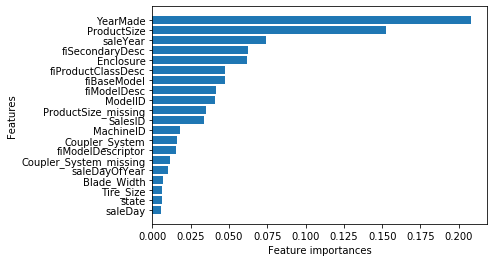

In [66]:
# plot the data
plot_features(x_train.columns, ideal_model.feature_importances_)